<a href="https://colab.research.google.com/github/PauSanchoBeneyto/Mercadona_Pontia/blob/main/Limpieza_DIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Cargamos los datos desde nuestro disco local, donde se encuentra el xslx con el dataset de DIA.

df_datos_dia=pd.read_excel("/content/data_dia.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_dia.xlsx'

In [ ]:
df_datos_dia

,ref pag,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio
0,L101,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25
1,L101,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39
2,L101,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49
3,L101,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59
4,L101,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84
...,...,...,...,...,...,...,...
5614,L2227,Bruma solar infantil spf 50+ Imaqe de Dia spra...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.35,6.69
5615,L2227,Protector solar infantil spf 50+ Imaqe de Dia ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.00,7.50
5616,L2227,Leche solar infantil spf 50+ Imaqe de Dia bote...,"Perfumería, higiene, salud",Cremas solares,100 ML.,2.16,5.40
5617,L2227,Aceite solar tacto seco con acelerador spf 15 ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,1.96,4.89


In [ ]:
# Comprobamos como ha quedado compuesto el dataset del supermercado DIA, despues del scrappeo realizado.
# Vemos que se compone de 5619 productos y de 7 campos.

df_datos_dia.shape

(5619, 7)

In [ ]:
# Los campos que scrappeamos son los siguientes: La referencia de la pagina donde se hallan los productos, el nombre de cada producto, la categoria principal, la subcategoria,
# La unidad de medida/unidad de referencia, el precio de venta del producto y el precio por referencia.
# Usando el metodo info() podemos ver que de los 5619 registros scrappeados uno de esos registros tiene algun dato nulo o todos los campos de dicho registro son nulos.
# También podemos ver el tipo de dato o variable de cada campo que compone el Dataset, en este caso tenemos variables de tipo objeto o string y las dos variables de tipo float que son los precios.

df_datos_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ref pag          5618 non-null   object 
 1   Nombre           5618 non-null   object 
 2   Categoria1       5618 non-null   object 
 3   Categoria2       5618 non-null   object 
 4   UM               5618 non-null   object 
 5   Precio Unitario  5618 non-null   float64
 6   Precio           5618 non-null   float64
dtypes: float64(2), object(5)
memory usage: 307.4+ KB


In [ ]:
# Sabiendo los datos de los que disponemos en la tabla, pasamos a verificar que realmente tenemos un registro con información nula.

df_datos_dia.isnull().sum()


ref pag            1
Nombre             1
Categoria1         1
Categoria2         1
UM                 1
Precio Unitario    1
Precio             1
dtype: int64

In [ ]:
# Realizamos una eliminación de todos los duplicados que puedan haber en el dataframe de DIA.

df_datos_dia.drop_duplicates()

,ref pag,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio
0,L101,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25
1,L101,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39
2,L101,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49
3,L101,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59
4,L101,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84
...,...,...,...,...,...,...,...
5614,L2227,Bruma solar infantil spf 50+ Imaqe de Dia spra...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.35,6.69
5615,L2227,Protector solar infantil spf 50+ Imaqe de Dia ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.00,7.50
5616,L2227,Leche solar infantil spf 50+ Imaqe de Dia bote...,"Perfumería, higiene, salud",Cremas solares,100 ML.,2.16,5.40
5617,L2227,Aceite solar tacto seco con acelerador spf 15 ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,1.96,4.89


In [ ]:
# Eliminamos las columnas que no son necesarias para nuestro análisis.

df_dia_limpieza = df_datos_dia.drop("ref pag", axis=1)

In [ ]:
df_dia_limpieza.head()

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio
0,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25
1,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39
2,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49
3,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59
4,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84


In [ ]:
# Para poder homogeneizar e unificar todas las categorias de los 3 supermercados en unas catagoricas unicas para todos, vamos a comprobar primero que categorias tiene el supermercado DIA.

valores_categoria1_unicos=df_dia_limpieza['Categoria1'].unique()
valores_categoria1_unicos

array(['Pescados, mariscos y ahumados', 'Charcutería y quesos',
       'Carnicería', 'Pizzas y platos preparados', 'Verduras', 'Frutas',
       'Aceites, salsas y especias', 'Arroz, pastas y legumbres',
       'Café, cacao e infusiones', 'Leche, huevos y mantequilla',
       'Azúcar, chocolates y caramelos', 'Galletas, bollos y cereales',
       'Panes, harinas y masas', 'Agua, refrescos y zumos',
       'Yogures y postres', 'Patatas fritas, encurtidos y frutos secos',
       'Conservas, caldos y cremas',
       'Cervezas, vinos y bebidas con alcohol', 'Congelados', 'Bebé',
       'Perfumería, higiene, salud', 'Limpieza y hogar', 'Mascotas', nan],
      dtype=object)

In [ ]:
# Sabiendo cuales son dichas categorias, vamos a asignar las categorias de mercadona a los productos de DIA.
# Para ello, teniendo en cuenta el campo "categoria1", la cual hace referencia a la categoria madre de los productos del supermercado DIA,
# realizaremos un diccionario llamado mapeo_categorias_principales para poder asignarle a cada categoria madre de DIA la categoria semejante de mercadona.

mapeo_categorias_principal = {
    'Pescados, mariscos y ahumados': 'Marisco y pescado',
    'Carnicería': 'Carne',
    'Verduras': 'Fruta y verdura',
    'Frutas': 'Fruta y verdura',
    'Aceites, salsas y especias': 'Aceite, especias y salsas',
    'Café, cacao e infusiones': 'Cacao, café e infusiones',
    'Leche, huevos y mantequilla': 'Huevos , leche y mantequilla',
    'Azúcar, chocolates y caramelos': 'Azúcar, caramelos y chocolate',
    'Galletas, bollos y cereales': 'Cereales y galletas',
    'Panes, harinas y masas': 'Panaderia y pasteleria',
    'Agua, refrescos y zumos': 'Agua y refrescos',
    'Yogures y postres': 'Postres y yogures',
    'Patatas fritas, encurtidos y frutos secos': 'Aperitivos',
    'Cervezas, vinos y bebidas con alcohol': 'Bodega',
    'Perfumería, higiene, salud': 'Fitoterapia y parafarmacia',
    'Charcutería y quesos': 'Charcutería y quesos',
    'Congelados': 'Congelados',
    'Bebé': 'Bebé',
    'Pizzas y platos preparados': 'Pizzas y platos preparados',
    'Arroz, pastas y legumbres': 'Arroz, legumbres y pastas',
    'Limpieza y hogar': 'Limpieza y hogar',
    'Mascotas': 'Mascotas',
    'Conservas, caldos y cremas': 'Conservas, caldos y cremas'

}

# Con la creacción del diccionario, usamos una función llamada asignar categoria principal, para poder encontrar en el campo categoria1 la categoria madre del supermercado DIA
# y crear una columna nueva llamada categoria_principal con las categorias de mercadona y en caso de no encontrar la categoria que pusiera "otra"

def asignar_categoria_principal(valor):
    return mapeo_categorias_principal.get(valor, 'otra')

df_dia_limpieza['categoria_principal'] = df_dia_limpieza['Categoria1'].apply(asignar_categoria_principal)



In [ ]:
df_dia_limpieza

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
0,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25,Marisco y pescado
1,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39,Charcutería y quesos
2,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49,Carne
3,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59,Carne
4,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84,Carne
...,...,...,...,...,...,...,...
5614,Bruma solar infantil spf 50+ Imaqe de Dia spra...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.35,6.69,Fitoterapia y parafarmacia
5615,Protector solar infantil spf 50+ Imaqe de Dia ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.00,7.50,Fitoterapia y parafarmacia
5616,Leche solar infantil spf 50+ Imaqe de Dia bote...,"Perfumería, higiene, salud",Cremas solares,100 ML.,2.16,5.40,Fitoterapia y parafarmacia
5617,Aceite solar tacto seco con acelerador spf 15 ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,1.96,4.89,Fitoterapia y parafarmacia


In [ ]:
# Con la función ejecutada anteriormente se descubren ciertos errores en la asiganción de los productos a algunas de las categorias de mercadona, por lo que se realiza una serie de filtros,
# para poder asignar correctamente los productos que con la anterior función no hayan sido asignados de manera idónea.

palabra_filtro = ['zumo']

filtro_nombre = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro), case=False)

df_dia_limpieza.loc[filtro_nombre & (df_dia_limpieza['categoria_principal'] == 'Agua y refrescos'), 'categoria_principal'] = 'Zumos'

In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['categoria_principal'] == 'Zumos']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
247,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Zumos
277,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Zumos
301,Zumo de naranja exprimida con pulpa Don Simón ...,"Agua, refrescos y zumos",Zumos,LITRO,2.95,2.95,Zumos
311,Zumo de piña 100% Zumosfera de Dia brik 1 l,"Agua, refrescos y zumos",Zumos,LITRO,1.25,1.25,Zumos
315,Bebida de frutas con leche tropical Zumosfera ...,"Agua, refrescos y zumos",Zumos,LITRO,1.01,1.00,Zumos
363,Zumo de naranja exprimida con pulpa Don Simón ...,"Agua, refrescos y zumos",Zumos,LITRO,2.95,2.95,Zumos
376,Zumo de piña 100% Zumosfera de Dia brik 1 l,"Agua, refrescos y zumos",Zumos,LITRO,1.25,1.25,Zumos
379,Bebida de frutas con leche tropical Zumosfera ...,"Agua, refrescos y zumos",Zumos,LITRO,1.01,1.00,Zumos
621,Zumo de naranja exprimida con pulpa Don Simón ...,"Agua, refrescos y zumos",Zumos,LITRO,2.95,2.95,Zumos
2724,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Zumos


In [ ]:
palabra_filtro_refresco = ['Refresco']

filtro_nombre_refresco = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro_refresco), case=False)

df_dia_limpieza.loc[filtro_nombre_refresco & (df_dia_limpieza['categoria_principal'] == 'Zumos'), 'categoria_principal'] = 'Agua y refrescos'

In [ ]:
# Durante la reasignación de las categorias, se comprueba que existen algunos registros duplicados en el dataframe.

df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Refresco de limón 6% zumo con gas Upss Dia botella 2 l']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
247,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
277,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
2724,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
2833,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
2931,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
3863,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
4794,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos
4938,Refresco de limón 6% zumo con gas Upss Dia bot...,"Agua, refrescos y zumos","Limón, lima limón",LITRO,0.46,0.92,Agua y refrescos


In [ ]:
# Por lo que se procede a su eliminación.

# Se revisa la cantidad de duplicados.

duplicados = df_dia_limpieza.duplicated()

# Sumando la cantidad de duplicados.

num_duplicados = duplicados.sum()

print(f"El número de filas duplicadas es {num_duplicados}")


El número de filas duplicadas es 1993


In [ ]:
# Al comprobar el número de duplicados, procedemos a eliminarlos.

df_dia_limpieza=df_dia_limpieza.drop_duplicates()

In [ ]:
df_dia_limpieza

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
0,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25,Marisco y pescado
1,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39,Charcutería y quesos
2,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49,Carne
3,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59,Carne
4,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84,Carne
...,...,...,...,...,...,...,...
5614,Bruma solar infantil spf 50+ Imaqe de Dia spra...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.35,6.69,Fitoterapia y parafarmacia
5615,Protector solar infantil spf 50+ Imaqe de Dia ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.00,7.50,Fitoterapia y parafarmacia
5616,Leche solar infantil spf 50+ Imaqe de Dia bote...,"Perfumería, higiene, salud",Cremas solares,100 ML.,2.16,5.40,Fitoterapia y parafarmacia
5617,Aceite solar tacto seco con acelerador spf 15 ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,1.96,4.89,Fitoterapia y parafarmacia


In [ ]:
# Posteriormente seguimos creando listas con palabras clave que puedan tener los nombres para de esta manera filtrar por dichos productos y asignarle la categoria correcta ha productos
# que detectamos que no tienen asignado la categoria correcta.

palabra_filtro_bolleria = ['Bizcochito', 'Bollo', 'palmeritas', 'Croissants', 'Magdalenas', 'Rosquillas', 'Napolitanas', 'Ensaimadas', 'Bocaditos',
                           'El molino de Dia', 'brownies', 'Rosquillas', 'Vigalitos', 'Conchas de chocolate', 'Bizcochos', 'Palitos de pan', 'Phoskitos',
                           'Donuts', 'Vulcanitos', 'Cortaditos', 'Rollitos de chocolate', 'Rondo de chocolate', 'Delicias de coco', 'Lazos hojaldre', 'Crepes',
                           'Grofre', 'Plum cake', 'Dulcesol', 'Fartons', 'Milhojas', 'Pastas artesanas', 'Sobaos', 'Bollo', 'Obleas', 'Pan de leche', 'Tortas',
                           'Medias noches', 'Bolleria']

filtro_nombre_bolleria = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro_bolleria), case=False)

df_dia_limpieza.loc[filtro_nombre_bolleria & (df_dia_limpieza['categoria_principal'] == 'Galletas, bollos y cereales'), 'categoria_principal'] = 'Panaderia y Pasteleria'

In [ ]:
palabra_filtro_parafarmacia = ['Povidona iodada', 'Protector labial', 'desmaquilladores', 'Senti2', 'Gasas', 'Botikit', 'Esparadrapo', 'Demak', 'Preservativos',
                           'Tiritas', 'Bastoncillos de algodón', 'Discos de algodón', 'Vaselina', 'Bastoncillos de papel']

filtro_nombre_parafarmacia = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro_parafarmacia), case=False)

df_dia_limpieza.loc[filtro_nombre_parafarmacia & (df_dia_limpieza['categoria_principal'] == 'Perfumeria, higiene y salud'), 'categoria_principal'] = 'Fitoterapia y parafarmacia'

In [ ]:
palabra_filtro_cuidado_facial = ['Crema de día hidratante', 'Crema antiarrugas', 'Crema facial', 'Crema suavizante', 'antiarrugas', 'Jabón', 'Cepillo dental', 'Pasta dentífrica', 'Enjuague bucal',
                           'Espuma de afeitar', 'hidratante', 'hidratantes', 'antiarrugas', 'Protegeslips', 'Desodorante', 'Maquinilla desechable', 'Quitaesmalte', 'Maquinilla', 'Gel',
                                 'Spray protector', 'Aftersun', 'afeitar', 'facial', 'Acondicionador', 'Mascarilla', 'capilar', 'Spray ondas surferas', 'Sérum', 'labial', 'Loción after', 'Arcos dentales'
                                 'Iluminador corporal', 'corporal', 'Body milk']

filtro_nombre_cuidado_facial = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro_cuidado_facial), case=False)

df_dia_limpieza.loc[filtro_nombre_cuidado_facial & (df_dia_limpieza['categoria_principal'] == 'Perfumeria, higiene y salud'), 'categoria_principal'] = 'Cuidado facial y corporal'

In [ ]:
palabra_filtro_cuidados_cabello = ['Laca', 'Champú', 'Espuma extrafuerte', 'Espuma rizos ', 'Cera fijadora', 'Gel fijación', 'Gel efecto mojado', 'Crema activadora', 'Protector térmico',
                           'Espuma perfect volume']

filtro_nombre_cuidados_cabello = df_dia_limpieza['Nombre'].str.contains('|'.join(palabra_filtro_cuidados_cabello), case=False)

df_dia_limpieza.loc[filtro_nombre_cuidados_cabello & (df_dia_limpieza['categoria_principal'] == 'Perfumeria, higiene y salud'), 'categoria_principal'] = 'Cuidados del cabello'

In [ ]:
#Comprobamos nuevamente después de eliminar los duplicados cuantas columnas y registros tiene nuestro dataframe
df_dia_limpieza.shape

(3626, 7)

In [ ]:
# Volvemos a comprobar cuantos datos nulos tenemos en el dataframe

df_dia_limpieza.isnull().sum()

Nombre                 1
Categoria1             1
Categoria2             1
UM                     1
Precio Unitario        1
Precio                 1
categoria_principal    0
dtype: int64

In [ ]:
# Comprobamos que los datos nulos procedan de un mismo registro para saber como proceder

df_dia_nulos = df_dia_limpieza[df_dia_limpieza.isnull().any(axis=1)]

In [ ]:
df_dia_nulos

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible,NaN,NaN,NaN,NaN,NaN,otro
4007,NaN,"Perfumería, higiene, salud",Desodorantes,100 ML.,2.0,3.99,Fitoterapia y parafarmacia


In [ ]:
# Como el nombre del producto de la fila en la que se encuentran todos los datos nulos es incorrecto (Habiendolo comprobado en la web de DIA), remplazamos el nombre erroreo por el correcto.

df_dia_limpieza['Nombre'] = df_dia_limpieza['Nombre'].replace({'Desodorante advanced care invisible': 'Desodorante advanced care invisible Dove spray 200 ml'})


<ipython-input-28-d101899b1e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_limpieza['Nombre'] = df_dia_limpieza['Nombre'].replace({'Desodorante advanced care invisible': 'Desodorante advanced care invisible Dove spray 200 ml'})


In [ ]:
# Revisamos que la linea de codigo de codigo se haya ejecutado de manera correcta.

df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,NaN,NaN,NaN,NaN,NaN,otro


In [ ]:
# Sabiendo que producto es usamos las siguientes lineaas de codigo para rellenar el resto de campos nulos del propio registro.

df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'categoria_principal'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'categoria_principal'].replace('otro', 'Cuidado facial y corporal')


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,NaN,NaN,NaN,NaN,NaN,Cuidado facial y corporal


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Categoria1'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Categoria1'].replace(np.nan, 'Perfumería, higiene, salud')


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,"Perfumería, higiene, salud",NaN,NaN,NaN,NaN,Cuidado facial y corporal


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Categoria2'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Categoria2'].replace(np.nan, 'Desodorantes')

In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,"Perfumería, higiene, salud",Desodorantes,NaN,NaN,NaN,Cuidado facial y corporal


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'UM'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'UM'].replace(np.nan, '100 ML.')

In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,"Perfumería, higiene, salud",Desodorantes,100 ML.,NaN,NaN,Cuidado facial y corporal


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Precio Unitario'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Precio Unitario'].replace(np.nan, '1.78')

In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,"Perfumería, higiene, salud",Desodorantes,100 ML.,1.78,NaN,Cuidado facial y corporal


In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Precio'] = df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml', 'Precio'].replace(np.nan, '3.55')

In [ ]:
df_dia_limpieza.loc[df_dia_limpieza['Nombre'] == 'Desodorante advanced care invisible Dove spray 200 ml']

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal
4006,Desodorante advanced care invisible Dove spray...,"Perfumería, higiene, salud",Desodorantes,100 ML.,1.78,3.55,Cuidado facial y corporal


In [ ]:
fila_4007 = df_dia_limpieza.loc[4007]
fila_4007

Nombre                                        NaN
Categoria1             Perfumería, higiene, salud
Categoria2                           Desodorantes
UM                                        100 ML.
Precio Unitario                               2.0
Precio                                       3.99
categoria_principal    Fitoterapia y parafarmacia
Name: 4007, dtype: object

In [ ]:
# Al no encontrar a que producto hace referencia estos datos, se toma la decisión de eliminar la fila de datos de este producto.

df_dia_limpieza.drop(4007, inplace=True)


<ipython-input-43-45e373aa2439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_limpieza.drop(4007, inplace=True)


In [ ]:
df_dia_limpieza.shape

(3625, 7)

In [ ]:
# Extraemos la marca de los productos por medio del nombre. Ponemos las marcas de DIA en un listado y creamos una función que las cotege en los nombres y si detecta alguna que la ponga en una nueva columna llamada Marcas.

marcas = ["Central Lechera Asturiana", "Colacao", "Fairy", "Mahou", "Ariel", "Nocilla", "Coca-Cola", "Nesquik", "Aquarius", "Kinder", "Nescafé", "Yatekomo",
          "Danacol", "Dodot", "Oreo", "Caja Roja", "Larios", "Suchard", "Chupa Chups", "Donettes", "Red Bull", "Doritos", "Bonte", "La Llama", "Superpaco",
          "Dia Láctea", "Almazara del Olivar", "Selección Mundial", "Nuestra Alacena", "Galleteca", "Cafetería Dia", "Selección de Dia", "Imaqe de Dia", "Deliperro de Dia",
          "Dia"]


def extraer_marca(nombre_producto):
    for marca in marcas:
        if marca in nombre_producto:
            return marca
    return 'otra'

df_dia_limpieza['Marca'] = df_dia_limpieza['Nombre'].apply(extraer_marca)




<ipython-input-45-10f68ac8a9fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_limpieza['Marca'] = df_dia_limpieza['Nombre'].apply(extraer_marca)


In [ ]:
df_dia_limpieza

,Nombre,Categoria1,Categoria2,UM,Precio Unitario,Precio,categoria_principal,Marca
0,Filete de bacalao Selección de Dia bandeja 350...,"Pescados, mariscos y ahumados",Pescados,KILO,14.99,5.25,Marisco y pescado,Selección de Dia
1,Queso fundido con palitos de pan La vaca que r...,Charcutería y quesos,Quesos fundidos y cremas,KILO,17.07,2.39,Charcutería y quesos,otra
2,Fiambre de lomo de pavo Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.38,2.49,Carne,otra
3,Pechuga de pavo adobada Serrano bandeja 240 g,Carnicería,Pavo,KILO,10.79,2.59,Carne,otra
4,Medio conejo troceado Selección de Dia bandeja...,Carnicería,Conejo,KILO,8.99,5.84,Carne,Selección de Dia
...,...,...,...,...,...,...,...,...
5614,Bruma solar infantil spf 50+ Imaqe de Dia spra...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.35,6.69,Fitoterapia y parafarmacia,Imaqe de Dia
5615,Protector solar infantil spf 50+ Imaqe de Dia ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,3.0,7.5,Fitoterapia y parafarmacia,Imaqe de Dia
5616,Leche solar infantil spf 50+ Imaqe de Dia bote...,"Perfumería, higiene, salud",Cremas solares,100 ML.,2.16,5.4,Fitoterapia y parafarmacia,Imaqe de Dia
5617,Aceite solar tacto seco con acelerador spf 15 ...,"Perfumería, higiene, salud",Cremas solares,100 ML.,1.96,4.89,Fitoterapia y parafarmacia,Imaqe de Dia


In [ ]:
# Comprobamos que los campos estan todos en formato object, por lo que debemos de modificar los campos de precio las cuales son formato float.
df_dia_limpieza.dtypes

Nombre                 object
Categoria1             object
Categoria2             object
UM                     object
Precio Unitario        object
Precio                 object
categoria_principal    object
Marca                  object
dtype: object

In [ ]:
df_dia_limpieza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3625 entries, 0 to 5618
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nombre               3625 non-null   object
 1   Categoria1           3625 non-null   object
 2   Categoria2           3625 non-null   object
 3   UM                   3625 non-null   object
 4   Precio Unitario      3625 non-null   object
 5   Precio               3625 non-null   object
 6   categoria_principal  3625 non-null   object
 7   Marca                3625 non-null   object
dtypes: object(8)
memory usage: 254.9+ KB


In [ ]:
df_dia_limpieza['Precio'] = pd.to_numeric(df_dia_limpieza['Precio'], errors='coerce')
df_dia_limpieza['Precio Unitario'] = pd.to_numeric(df_dia_limpieza['Precio Unitario'], errors='coerce')


<ipython-input-49-02b0f093708d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_limpieza['Precio'] = pd.to_numeric(df_dia_limpieza['Precio'], errors='coerce')
<ipython-input-49-02b0f093708d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_limpieza['Precio Unitario'] = pd.to_numeric(df_dia_limpieza['Precio Unitario'], errors='coerce')


In [ ]:
# Comprobamos que se hayan modificado

df_dia_limpieza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3625 entries, 0 to 5618
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               3625 non-null   object 
 1   Categoria1           3625 non-null   object 
 2   Categoria2           3625 non-null   object 
 3   UM                   3625 non-null   object 
 4   Precio Unitario      3625 non-null   float64
 5   Precio               3625 non-null   float64
 6   categoria_principal  3625 non-null   object 
 7   Marca                3625 non-null   object 
dtypes: float64(2), object(6)
memory usage: 254.9+ KB


In [ ]:
# Realizamos un describe para que nos muestre los datos estadisticos basicos de los campos numéricos

df_dia_limpieza.describe()

,Precio Unitario,Precio
count,3625.000000,3625.000000
mean,8.827040,3.292105
std,19.407014,3.670592
min,0.010000,0.220000
25%,1.850000,1.500000
50%,4.980000,2.340000
75%,10.560000,3.690000
max,462.500000,62.300000


El "describe" nos muestra que la mayoria de productos de DIA se mueven en rangos de precios de 1,85€ a 10,56€ en el caso de los precios por unidad y entre 1,50€ y 3,69€ en el caso de los precios por articulo. Viendo que las medias se encuentran más proximas al tercer cuartil y que la desviación es alta, ya existe mucha diferenncia entre el maximo y el tercer cuartil, se puede entre ver que existen valores atípicos.

In [ ]:
df_dia_limpieza["Precio"].describe().round(2)

count    3625.00
mean        3.29
std         3.67
min         0.22
25%         1.50
50%         2.34
75%         3.69
max        62.30
Name: Precio, dtype: float64

In [ ]:
# Para poder comprobar si la desviación estandar es muy grande o no. Calculamos el ratio para saber como se dispersa la distribución

df_dia_limpieza["Precio"].std()/df_dia_limpieza["Precio"].mean()

1.1149681967888596

<Axes: >

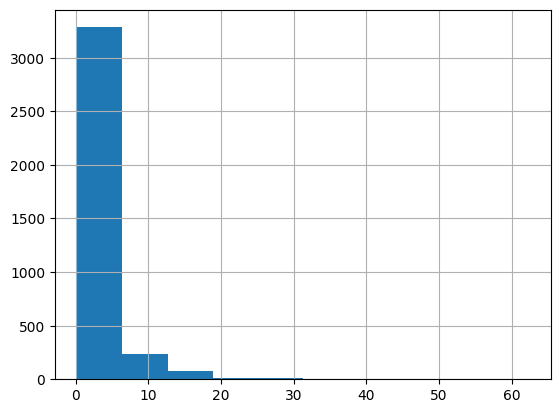

In [ ]:
# Realizamos un histrograma para ver la distribución de la variable "Precios"

df_dia_limpieza["Precio"].hist(bins=10)

Con el histograma vemos que la variable de los precios de DIA se mueve entre 0.22 y menos de 20€ la mayoria de los precios de los productos.

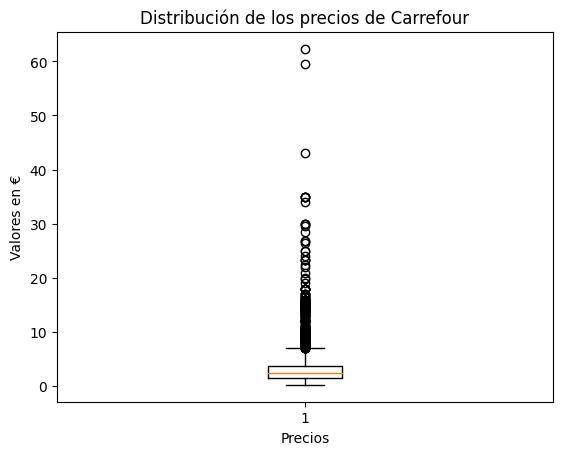

In [ ]:
# Usamos un boxplot para poder ver la dispersión de la variable Precios.
plt.boxplot(df_dia_limpieza["Precio"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

Al realizar el boxplot podemos ver de una forma grafica la cantidad de outliers.

In [ ]:
# Realizamos otra comprobación por cuartiles para poder verlo de una manera más clara

print("Diferencias percentiles de la distribución de los precios")
df_dia_limpieza["Precio"].quantile([0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999])

Diferencias percentiles de la distribución de los precios


0.1000     0.99000
0.2500     1.50000
0.5000     2.34000
0.7500     3.69000
0.9000     5.99000
0.9500     8.99000
0.9900    16.91160
0.9990    34.99000
0.9999    61.28528
Name: Precio, dtype: float64

In [ ]:
# Si importamos scipy, podemos calcular una media más robusta.
from scipy.stats import trim_mean

print("Media truncada")
round(trim_mean(df_dia_limpieza["Precio"],0.05),2)

Media truncada


2.76

In [ ]:
# Sacamos el dato del IQR para poder poder determinar de que precios a que precio debemos tener en cuenta los limites.
IQR = (df_dia_limpieza["Precio"].quantile(0.75) - df_dia_limpieza["Precio"].quantile(0.25)).round(2)

print(IQR)

inferior = (df_dia_limpieza["Precio"].quantile(0.75) - 3*IQR).round(2)
superior = (df_dia_limpieza["Precio"].quantile(0.75) + 3*IQR).round(2)

print([inferior, superior])


2.19
[-2.88, 10.26]


En el análisis de datos que hemos realizado, hemos observado que el rango intercuartil se sitúa en 2.19. Además, los límites para la identificación de valores atípicos se establecen en -2.88 y 10.26. Esto implica que cualquier valor de precio que se encuentre por debajo de -2.88 o por encima de 10.26 sería clasificado como un valor atípico.

En este contexto, aunque el límite superior se encuentra en 10.26, lo que sugeriría un corte en este punto, hemos decidido adoptar un enfoque diferente para nuestro análisis. En lugar de ello, hemos optado por establecer el corte en el percentil 99, que corresponde a un precio de 16.91. Esta decisión se basa en que este valor es más representativo de los precios en otros supermercados competidores. Creemos que este enfoque será más beneficioso para nuestro análisis, especialmente cuando se trata de consolidar la información de cada supermercado en un conjunto de datos general. Esta metodología nos permitirá realizar comparaciones más precisas y significativas.

In [ ]:
# Procedemos de este modo a dividir los datos en dos dataframes de la siguiente manera:

df__Dia_precios_altos = df_dia_limpieza[df_dia_limpieza["Precio"] > 16.91]
df_Dia_precios_bajos = df_dia_limpieza[df_dia_limpieza["Precio"] <= 16.91]


In [ ]:
df_Dia_precios_bajos.shape

(3588, 8)

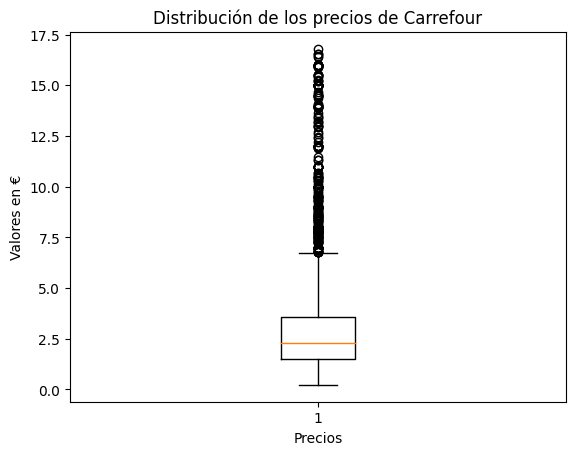

In [ ]:
# Realizamos nuevamente otro boxplot para poder comprobar como queda el datafrme que tendremos en cuenta para el analisis

plt.boxplot(df_Dia_precios_bajos["Precio"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

Consideramos tener en cuenta los productos con los precios que se perciben atipicos, debido a que se encuentran todos muy juntos y no hay un salto considerable.

In [ ]:
df_Dia_precios_bajos.describe().round(2)

,Precio Unitario,Precio
count,3588.00,3588.00
mean,8.66,3.05
std,19.31,2.59
min,0.01,0.22
25%,1.85,1.49
50%,4.93,2.29
75%,10.43,3.59
max,462.50,16.79


<Axes: >

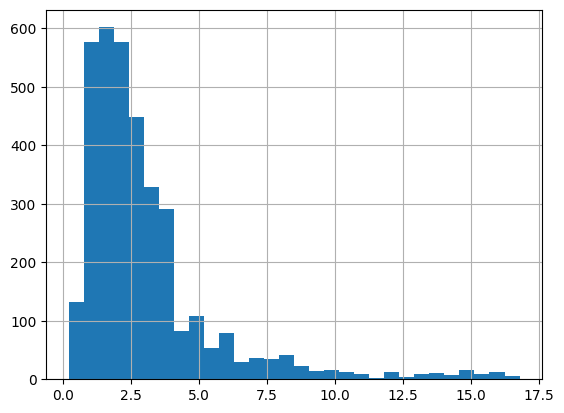

In [ ]:
# Comprobamos de esta manera la distribución final de los precios

df_Dia_precios_bajos["Precio"].hist(bins=30)

In [ ]:
df_Dia_precios_bajos.to_csv(r"DIA_limpio_10-06-2024.csv",index=False)